<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figure-13.1" data-toc-modified-id="Figure-13.1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Figure 13.1</a></span></li><li><span><a href="#Figure-13.2" data-toc-modified-id="Figure-13.2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure 13.2</a></span></li><li><span><a href="#Figure-13.4" data-toc-modified-id="Figure-13.4-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Figure 13.4</a></span></li><li><span><a href="#Figure-13.5" data-toc-modified-id="Figure-13.5-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Figure 13.5</a></span></li><li><span><a href="#Figure-13.6" data-toc-modified-id="Figure-13.6-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Figure 13.6</a></span></li><li><span><a href="#Figure-13.8" data-toc-modified-id="Figure-13.8-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Figure 13.8</a></span></li><li><span><a href="#Figure-13.9" data-toc-modified-id="Figure-13.9-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Figure 13.9</a></span></li><li><span><a href="#Figure-13.10" data-toc-modified-id="Figure-13.10-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Figure 13.10</a></span></li><li><span><a href="#Figure-13.11" data-toc-modified-id="Figure-13.11-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Figure 13.11</a></span></li><li><span><a href="#Figure-13.12" data-toc-modified-id="Figure-13.12-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Figure 13.12</a></span></li><li><span><a href="#Figure-13.13" data-toc-modified-id="Figure-13.13-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Figure 13.13</a></span></li><li><span><a href="#Figure-13.14" data-toc-modified-id="Figure-13.14-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Figure 13.14</a></span></li><li><span><a href="#Figure-13.15" data-toc-modified-id="Figure-13.15-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Figure 13.15</a></span></li></ul></div>

In [1]:
## Analyzing Neural Time Series Data
# Python code for Chapter 13
# Yujin Goto (MATLAB original code: Mike X Cohen)
# 
# This code accompanies the book, titled "Analyzing Neural Time Series Data" 
# (MIT Press). Using the code without following the book may lead to confusion, 
# incorrect data analyses, and misinterpretations of results. 
# Mike X Cohen and Yujin Goto assumes no responsibility for inappropriate or incorrect use of this code. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
from ipywidgets import interact, FloatSlider, IntSlider
from mpl_toolkits.mplot3d import Axes3D

import mne
from mne import events_from_annotations

In [3]:
# load EEG data (.vhdr converted ver. by Yujin)
mne.set_log_level('CRITICAL') # delete this line for your environment
raw = mne.io.read_raw_brainvision('./NeuralData/sampleEEGdata_convert.vhdr', eog=['HEOG', 'VEOG'], preload=True)
mne.set_log_level('INFO') # delete this line for your environment

# load electrodes location montage
montage = mne.channels.read_custom_montage('./NeuralData/sampleEEG_loc.loc')
raw.set_montage(montage)

# Getting event timings (for .mat file, you don't have to do this.) and epoching
events, event_dict = events_from_annotations(raw)

epochs = mne.Epochs(
    raw,
    events,
    event_id = {'New Segment/': 99999},
    tmin = 0,
    tmax = 2.496,
    baseline = None,
)

# Extract variables
data = epochs.get_data()*(10**6)                 # EEG data (array; trial, ch, time). MNE-pyton reads data in volts(V), not microvolts (μV).
pnts = data.shape[2]                             # Number of points in EEG data (scalar)
times = epochs.times-1                           # Time points of data (array)
tmin = epochs.tmin-1                             # The start timing of epoch (the start timing of the baseline is set to be 0 in default)
tmax = epochs.tmax-1                             # The end timing of epoch
srate = epochs.info['sfreq']                     # Sampling rate (scalar)
trials = len(epochs.events)                      # Trials (scalar)
nbchan = len(epochs.ch_names)                    # Number of channel (scalar)


chan_labels = epochs.info['ch_names']

# channel locations
chan_pos = []
for ch in epochs.info['chs']:
    x,y,z = ch['loc'][:3]
    chan_pos.append((x,y,z))

Used Annotations descriptions: ['New Segment/', 'Stimulus/1', 'Stimulus/2', 'Stimulus/31', 'Stimulus/32', 'Stimulus/51', 'Stimulus/52']
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 99 events and 640 original time points ...
0 bad epochs dropped


## Figure 13.1

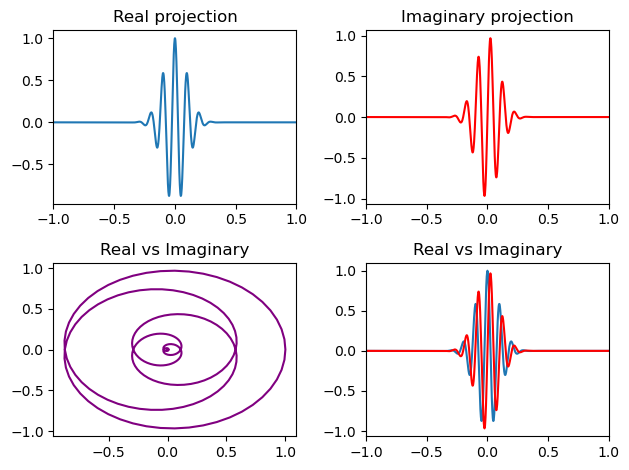

In [4]:
#parameters

s_rate = 500 #sampling rate in Hz
f = 10 #frequency of wavelet in Hz
time = np.arange(-1,1+1/s_rate,1/s_rate)

s = 6/(2*np.pi*f) # standard deviation for wavelet

wavelet = np.exp(2*np.pi*1j*f*time) * np.exp(-time**2/(2*s**2)) #multiple complex sinewave by gaussian to make morlet wavelet

plt.subplot(2, 2, 1)
plt.plot(time,np.real(wavelet))
plt.xlim([-1,1])
plt.title("Real projection")


plt.subplot(2, 2, 2)
plt.plot(time,np.imag(wavelet),'r')
plt.xlim([-1,1])
plt.title("Imaginary projection")


plt.subplot(2, 2, 3)
plt.plot(np.real(wavelet),np.imag(wavelet),'purple')
plt.title("Real vs Imaginary")

plt.subplot(2, 2, 4)
plt.plot(time,np.real(wavelet))
plt.plot(time,np.imag(wavelet),'r')
plt.xlim([-1,1])
plt.title("Real vs Imaginary")

plt.tight_layout()

## Figure 13.2

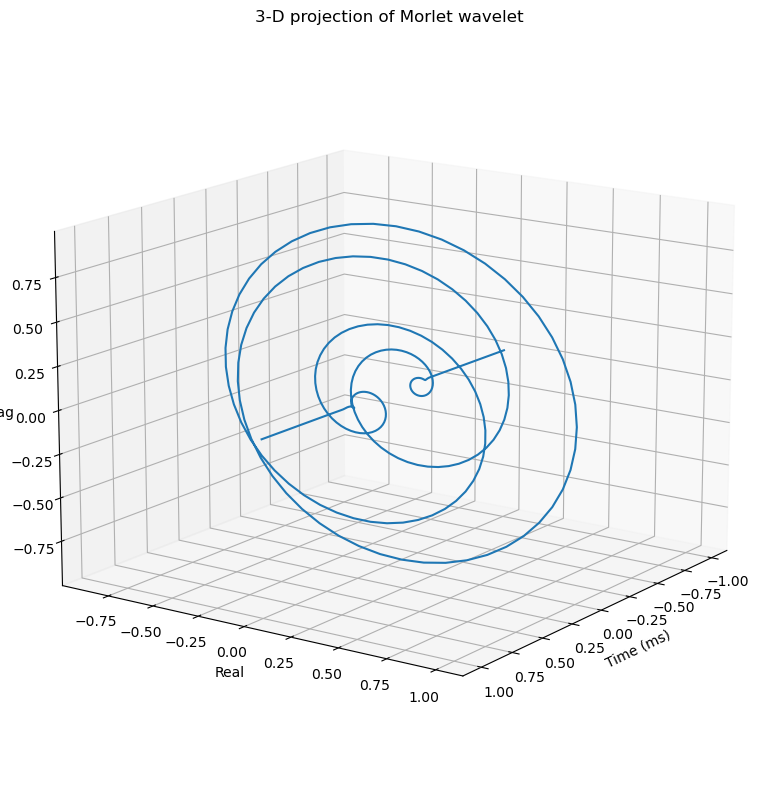

In [5]:
fig=plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(time,np.real(wavelet),zs=np.imag(wavelet))
ax.view_init(15,35)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Real')
ax.set_zlabel('Imag')
_=plt.title("3-D projection of Morlet wavelet")

fig.tight_layout()

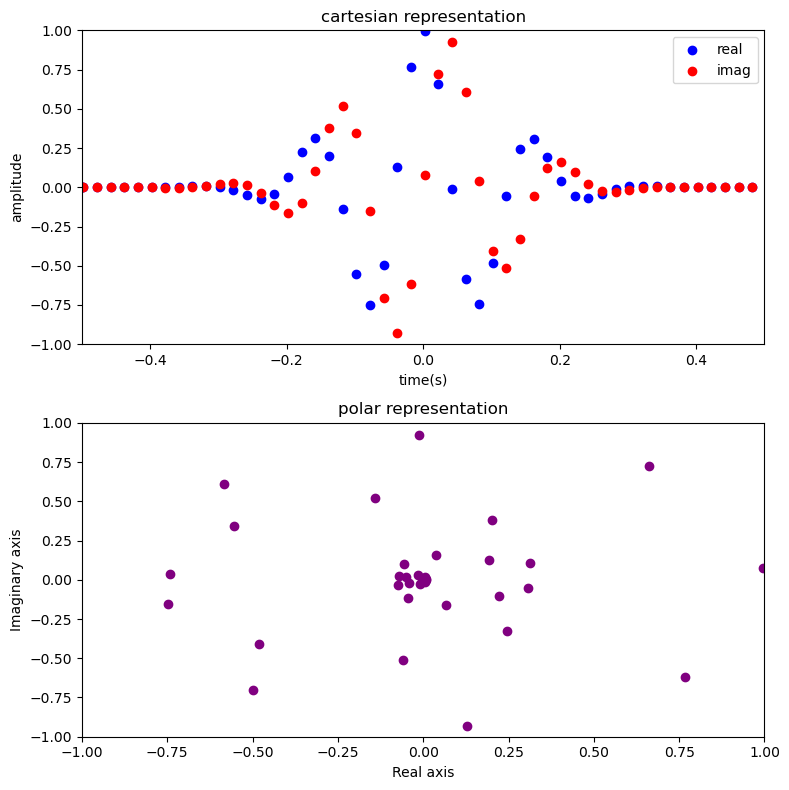

<Figure size 800x800 with 0 Axes>

In [6]:
frequency = 6 #frequency of sine wave
s_rate = 500 
time = np.arange(-.5,0.5+1/s_rate,1/s_rate)

#create the complex wavelet
wavelet = np.exp(2*1j*np.pi*frequency*time) * np.exp(-time**2/(2*(4/(2*np.pi*frequency))**2))

f, axes = plt.subplots(2, 1)
f.set_size_inches(8, 8)

#set up top row of data (real and imaginary in cartesian plot)
cplotR = axes[0].scatter(time[0],np.real(wavelet[0]),c='b')
cplotI = axes[0].scatter(time[0],np.imag(wavelet[0]),c='r')
axes[0].axis([time[0],time[-1],-1,1])

axes[0].set_title("cartesian representation")
axes[0].set_ylabel("amplitude")
axes[0].set_xlabel("time(s)")
axes[0].legend(["real","imag"])

#set up bottom row of data (polar presentation)
pplot = axes[1].scatter(np.real(wavelet[0]),np.imag(wavelet[0]),c='purple')
plt.axis([-1,1,-1,1])
plt.xlabel("Real axis")
plt.ylabel("Imaginary axis")
plt.title("polar representation")
plt.tight_layout()

timeskip = 10 #if computer is slow, change this to higher number

for ti in np.arange(1,len(time),timeskip):
    try:
        display.clear_output(wait=True)

        #update cartesian plots
        axes[0].scatter(time[ti],np.real(wavelet[ti]),c='b')
        axes[0].scatter(time[ti],np.imag(wavelet[ti]),c='r')
        
        #update polar plot
        axes[1].scatter(np.real(wavelet[ti]),np.imag(wavelet[ti]),c='purple')

        display.display(plt.gcf())

    except Exception as e:   
        break
        
f.clear()

## Figure 13.4

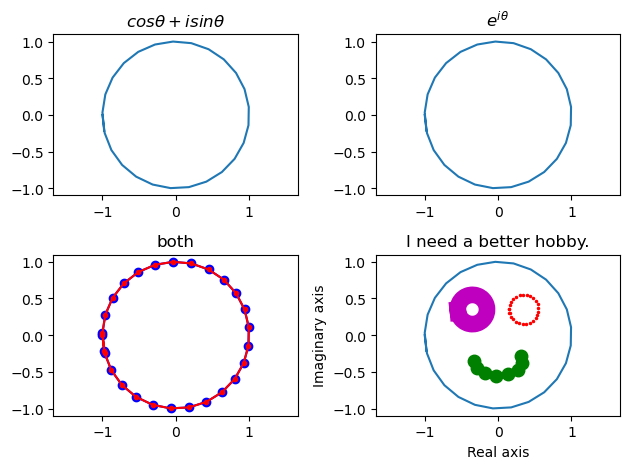

In [7]:
time = np.arange(-np.pi,np.pi+.25,.25)

plt.subplot(2, 2, 1)
plt.plot(np.real(np.cos(time) + 1j*np.sin(time)),np.imag(np.cos(time) + 1j*np.sin(time)))
_=plt.axis("equal")
plt.title(r"$cos\theta + i sin\theta$")

#Using Euler's formula
plt.subplot(2, 2, 2)
plt.plot(np.real(np.exp(1j*time)),np.imag(np.exp(1j*time)))
_=plt.axis("equal")
plt.title(r"$e^{i\theta}$")

plt.subplot(2, 2, 3)
plt.plot(np.real(np.cos(time) + 1j*np.sin(time)),np.imag(np.cos(time) + 1j*np.sin(time)),'bo-')
plt.plot(np.real(np.exp(1j*time)),np.imag(np.exp(1j*time)),'r.-')
plt.title("both")
plt.axis("equal")

plt.subplot(2, 2, 4)
face = np.cos(time)+1j*np.sin(time)
plt.plot(np.real(face),np.imag(face)) #plot face
leftEye = (-.35 + np.cos(time)/5) + 1j*(.35 + np.sin(time)/5)
plt.plot( np.real(leftEye), np.imag(leftEye),'m',linewidth = 12) #left eye
rightEye = (+.35 + np.cos(time)/5) + 1j*(.35 + np.sin(time)/5)
plt.plot(np.real(rightEye),np.imag(rightEye)  ,'r.',markersize=3) #right eye
smile = np.arange(-np.pi,0+0.5,0.5)
mouth = (np.cos(smile)/3) + 1j*(-.35+np.sin(smile)/5)
plt.plot(np.real(mouth),np.imag(mouth)  ,'go',markersize=9) #mouth
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.axis("equal")
plt.title('I need a better hobby.')

plt.tight_layout()

## Figure 13.5

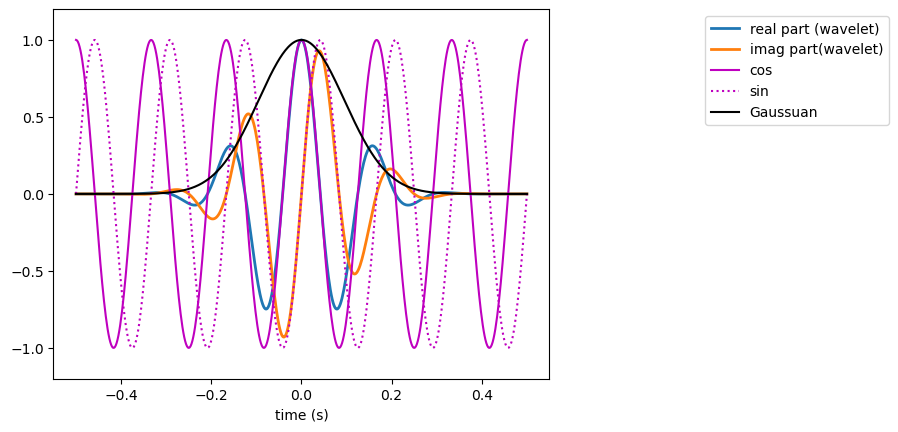

In [8]:
# redefine time
time = np.arange(-.5,.5+1/s_rate,1/s_rate)

#plot real and imaginary parts of wavelet
plt.plot(time,np.real(wavelet),linewidth = 2)
plt.plot(time,np.imag(wavelet),linewidth = 2)

#plot cosine and sine
plt.plot(time,np.cos(2*np.pi*frequency*time),'m')
plt.plot(time,np.sin(2*np.pi*frequency*time),'m:')

#plot gaussian window
gaus_win = np.exp(-time**2/(2*s**2))
plt.plot(time,gaus_win,'k')
plt.ylim([-1.2,1.2])
plt.xlabel("time (s)")
plt.legend(["real part (wavelet)","imag part(wavelet)","cos","sin","Gaussuan"], bbox_to_anchor = [1.3, 1])

## Figure 13.6

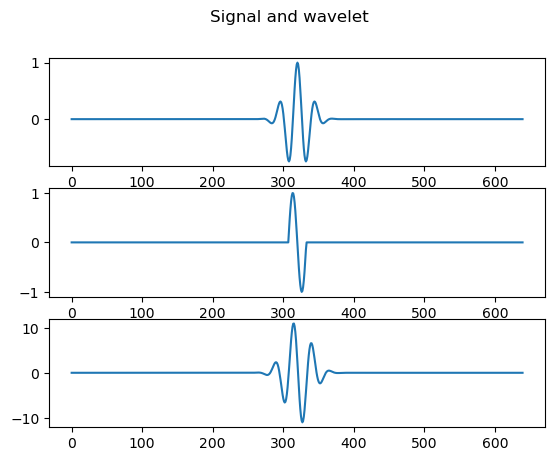

In [9]:
time = np.arange( -1*pnts/srate/2., pnts/srate/2. , 1/srate)
f = 10 #frequency of sine wave in Hz
s = 4/(2*np.pi*f)
wavelet = np.exp(1j*2*np.pi*f*time) * np.exp(-time **2 /(2*s**2))

#signal is one sine cycle
timeS = np.arange(0,1/f,1/srate) # one cycle is 1/f
signal = np.sin(2*np.pi*f*timeS)

#now zero-pad signal
signal = np.concatenate([np.zeros(pnts//2 - len(timeS)//2),signal,np.zeros(pnts//2 - len(timeS)//2)])

plt.suptitle('Signal and wavelet')
plt.subplot(3, 1, 1)
plt.plot(np.real(wavelet))

plt.subplot(3, 1, 2)
plt.plot(signal)

plt.subplot(3, 1, 3)
_=plt.plot(np.real(np.convolve(wavelet,signal,mode="same")))

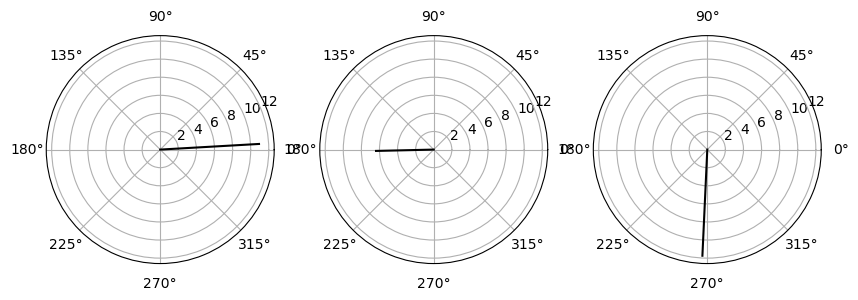

In [10]:
# now plot dot products at selected phase lags in polar space
fig, axes = plt.subplots(1, 3, subplot_kw=dict(polar=True))
fig.set_size_inches(10, 10.5)

axes[0].plot(0,12,'-k')
dp = np.sum(wavelet[int(100//f)-3:]*signal[:-int(100//f)+3])
axes[0].plot([np.angle(dp),np.angle(dp)],[0,np.abs(dp)],'-k')

axes[1].plot(0,12,'-k')
dp = np.sum(wavelet[int(2.3*(100/f))-3:]*signal[:-int(2.3*(100/f))+3])
axes[1].plot([np.angle(dp),np.angle(dp)],[0,np.abs(dp)],'-k')

axes[2].plot(0,12,'-k')
dp = np.sum(wavelet*signal);
_=axes[2].plot([np.angle(dp),np.angle(dp)],[0,np.abs(dp)],'-k')

## Figure 13.8

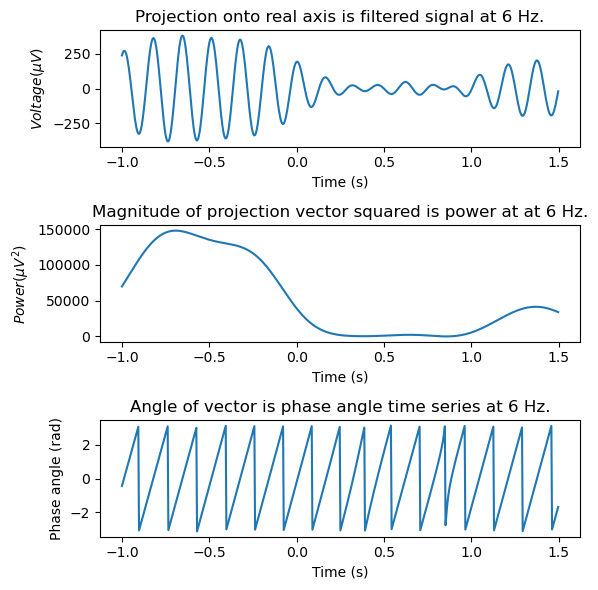

In [11]:
# create wavelet
frequency = 6 # in Hz, as usual
time = np.arange(-1,1 + 1/srate,1/srate)
s = (4 / (2*np.pi*frequency)) **2 # note that s is squared here rather than in the next line
wavelet = np.exp(2 * 1j * np.pi * frequency * time) * np.exp(-time**2./(2*s)/frequency)

# FFT parameters
n_wavelet = len(wavelet)
n_data = pnts
n_convolution = n_wavelet + n_data-1
half_of_wavelet_size = len(wavelet)//2

#fft of wavelet and eeg data
fft_wavelet = np.fft.fft(wavelet,n_convolution)
fft_data = np.fft.fft(data[0, 46,:],n_convolution)# FCz, trial 1

convolution_result_fft = np.fft.ifft(fft_wavelet * fft_data,n_convolution)

#cut off edges
convolution_result_fft = convolution_result_fft[half_of_wavelet_size :-half_of_wavelet_size]

#plot for comparison
fig = plt.figure(figsize=(6,6))
plt.subplot(3,1,1)
plt.plot(times,np.real(convolution_result_fft))
plt.xlabel('Time (s)')
plt.ylabel(r'$Voltage (\mu V)$')
plt.title( 'Projection onto real axis is filtered signal at ' + str(frequency) + ' Hz.' )

plt.subplot(3, 1, 2)
plt.plot(times,np.abs(convolution_result_fft)**2)
plt.xlabel('Time (s)')
plt.ylabel(r'$Power (\mu V^2)$')
plt.title( 'Magnitude of projection vector squared is power at at ' + str(frequency) + ' Hz.' )

plt.subplot(3, 1, 3)
plt.plot(times,np.angle(convolution_result_fft))
plt.xlabel('Time (s)')
plt.ylabel('Phase angle (rad)')
plt.title( 'Angle of vector is phase angle time series at ' + str(frequency) + ' Hz.' )

plt.tight_layout()

## Figure 13.9

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider, IntSlider
import numpy as np

@interact(elev=IntSlider(min=-180, max=180, step=10, value=30, continuous_update=False), 
          azim=IntSlider(min=-180, max=180, step=10, value=30, continuous_update=False))
def plot_3d(elev, azim):
    fig = plt.figure(figsize=(15, 40))

    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.plot(times, np.real(convolution_result_fft), np.imag(convolution_result_fft))
    ax1.view_init(elev=elev, azim=azim)
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Real')
    ax1.set_zlabel('Imag')
    ax1.set_title('Time, real, imganinary axes')

    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.plot(times, np.abs(convolution_result_fft), np.angle(convolution_result_fft))
    ax2.view_init(elev=elev, azim=azim)
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Amplitude')
    ax2.set_zlabel('Phase (rad)')
    ax2.set_title('Time, amplitude, phase axes')

    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.plot(times,np.angle(convolution_result_fft),np.abs(convolution_result_fft))
    ax3.plot(times,np.angle(convolution_result_fft),np.real(convolution_result_fft),'r')
    ax3.view_init(elev=elev, azim=azim)
    ax3.set_xlabel('Time (s)')
    ax3.set_ylabel('Phase (rad)')
    ax3.set_zlabel('amplitude')
    ax3.set_title('Time, phase, amplitude axes')

    plt.show()

interactive(children=(IntSlider(value=30, continuous_update=False, description='elev', max=180, min=-180, step…

## Figure 13.10

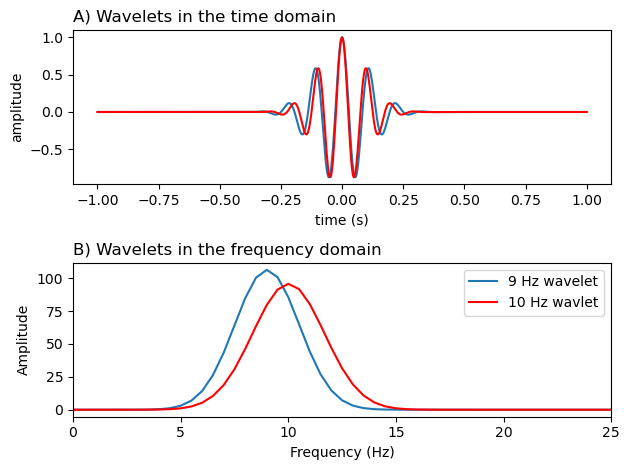

In [13]:
s_rate = 400 # sampling rate in Hz
time = np.arange(-1,1 + 1/s_rate, 1/s_rate) # time, from -1 to 1 second in steps of 1/sampling-rate

# create a 9 Hz wavelet
f = 9 # frequency of wavelet in Hz
s = 6/(2*np.pi*f)
wavelet9 = np.exp(2*np.pi*1j*f*time) * np.exp(-time **2 /(2*s**2))

# create a 10 Hz wavelet
f = 10 # frequency of wavelet in Hz
s = 6/(2*np.pi*f)
wavelet10 = np.exp(2*np.pi*1j*f*time) * np.exp(-time **2 /(2*s**2))

plt.subplot(2, 1, 1)
plt.plot(time,np.real(wavelet9))
plt.plot(time,np.real(wavelet10),'r')
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.title('A) Wavelets in the time domain', loc='left')

plt.subplot(2, 1,2)

hz = np.linspace(0,s_rate/2,(len(time)//2)+1);
fft9 = np.fft.fft(wavelet9)
fft10 = np.fft.fft(wavelet10)

plt.plot(hz,np.abs(fft9[:len(hz)]))
plt.plot(hz,np.abs(fft10[:len(hz)]),'r')

plt.xlim([0,25])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend(["9 Hz wavelet","10 Hz wavlet"])
plt.title('B) Wavelets in the frequency domain', loc='left')
plt.tight_layout()

## Figure 13.11

In [25]:
#definitions, selections...
min_freq = 2
max_freq = 80
num_frex = 30
selectedChannel =  np.array([x=='FCz' for x in chan_labels])

#define wavelet parameters
time = np.arange(-1, 1+1/srate, 1/srate)
frex = np.logspace(np.log10(min_freq),np.log10(max_freq),num_frex)
def timefrequency(fignum):
    if fignum==11:
        s = np.logspace(np.log10(3), np.log10(10), num_frex)/(2 * np.pi * frex)
    elif fignum==141:
        s =  3/(2*np.pi*frex)
    elif fignum==142:
        s = 10/(2*np.pi*frex)

    # define convolution parameters
    n_wavelet = len(time)
    n_data = pnts * trials
    n_convolution = n_wavelet + n_data - 1
    n_conv_pow2 = int(2 ** np.ceil(np.log2(n_convolution))) # pow2(nextpow2(n_convolution))
    half_of_wavelet_size = (n_wavelet) // 2


    # get FFT of data
    eegfft = np.fft.fft(np.reshape(data[:,selectedChannel,:],[pnts * trials]),n_conv_pow2)

    baseidx = [np.argmin(np.abs(times - t)) for t in [-.5, -.2]]

    # initialize
    eegpower = np.zeros([num_frex,pnts]) # frequencies x time x trials
    for fi in range(num_frex):
        wavelet = np.fft.fft(np.sqrt(1/(s[fi]*np.sqrt(np.pi))) * np.exp(2 * 1j * np.pi * frex[fi] * time) * np.exp(-time ** 2/ (2*(s[fi]**2))),n_conv_pow2)

        # convolution 
        eegconv = np.fft.ifft(wavelet * eegfft)
        eegconv = eegconv[:n_convolution]
        eegconv = eegconv[half_of_wavelet_size:-half_of_wavelet_size]

        # average power over trials this code performs baseline transform, which you will learn about in more in chapter 18
        temppower = np.mean(np.abs(np.reshape(eegconv,[pnts,trials],order="F")) ** 2,axis=1)
        eegpower[fi,:] = 10 * np.log10(temppower/np.mean(temppower[baseidx[0]:baseidx[1]]))


    plt.figure(figsize=[14,6])
    ax1=plt.subplot(1,2,1)
    ax1.set_yscale("log")

    CS = plt.contourf(times,frex, eegpower, 40,vmin=-3,vmax=3, cmap=plt.cm.jet, origin = "lower")
    ax1.set_yticks(np.logspace(np.log10(min_freq),np.log10(max_freq),6))
    ax1.set_yticklabels(np.round(np.logspace(np.log10(min_freq),np.log10(max_freq),6)))
    ax1.set_xlim([-.2,1])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title("A) Logarithmic frequency scaling")


    ax2=plt.subplot(1,2,2)
    CS = plt.contourf(times,frex, eegpower, 40, vmin=-3,vmax=3,cmap=plt.cm.jet)#                 origin = ,)
    ax2.set_xlim([-.2,1])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title("B) Linear frequency scaling")

    plt.tight_layout()
    
    return eegpower

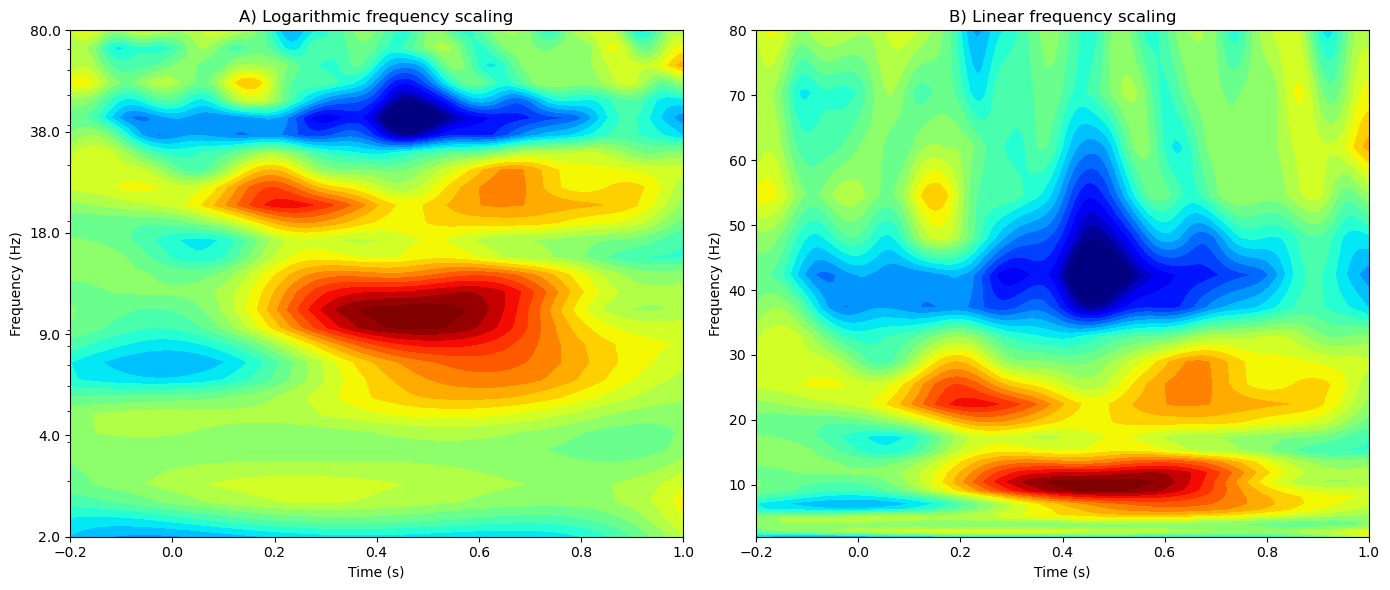

In [26]:
eegpower = timefrequency(11)

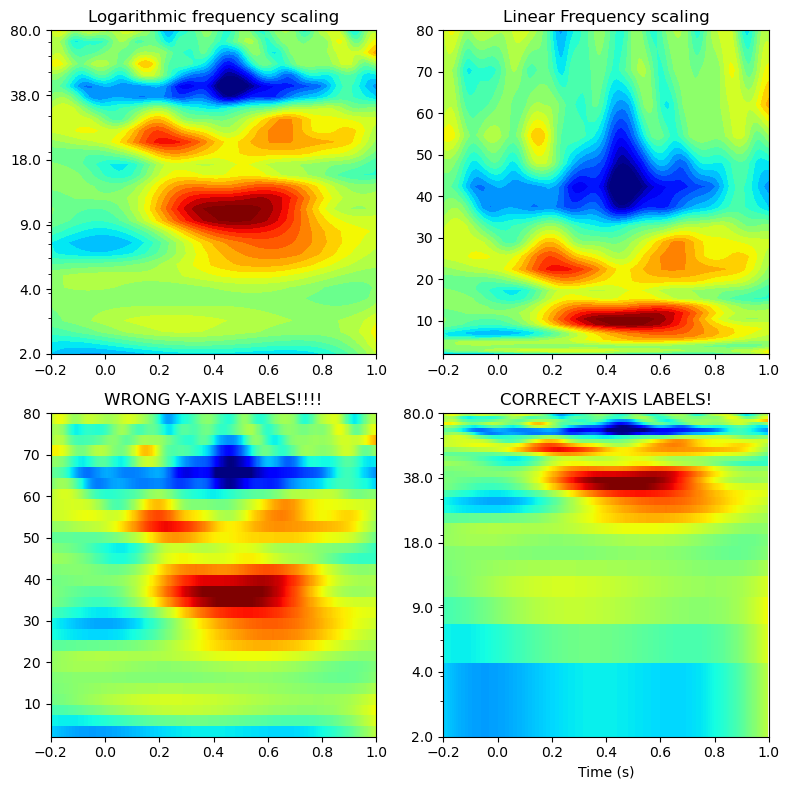

In [27]:
plt.figure(figsize=[8,8])

ax1 = plt.subplot(2,2,1)
ax1.set_yscale("log")
    
plt.contourf(times,frex, eegpower, 40, vmin=-3,vmax=3, cmap=plt.cm.jet, origin = "lower")
ax1.set_yticks(np.logspace(np.log10(min_freq),np.log10(max_freq),6))
ax1.set_yticklabels(np.round(np.logspace(np.log10(min_freq),np.log10(max_freq),6)))
ax1.set_xlim([-.2,1])
plt.title("Logarithmic frequency scaling")

ax2 = plt.subplot(2, 2,2)
    
plt.contourf(times,frex, eegpower, 40, vmin=-3, vmax=3, cmap=plt.cm.jet,origin = "lower")
ax2.set_xlim([-.2,1])
plt.title("Linear Frequency scaling")

ax3 = plt.subplot(2,2,3)
    
plt.imshow(eegpower, vmin=-3, vmax=3, cmap=plt.cm.jet, origin = "lower", aspect = "auto",
           interpolation = "none", extent = [times[0],times[-1],min_freq,max_freq])
plt.clim(-3, 3)
ax3.set_xlim([-.2,1])
plt.title("WRONG Y-AXIS LABELS!!!!")


ax4 = plt.subplot(2,2,4)
ax4.set_yscale("log")

plt.imshow(eegpower, vmin=-3,vmax=3, cmap=plt.cm.jet, origin = "lower", aspect = "auto",
           interpolation = "none", extent = [times[0],times[-1],min_freq,max_freq])
ax4.set_yticks(np.logspace(np.log10(min_freq),np.log10(max_freq),6))
ax4.set_yticklabels(np.round(np.logspace(np.log10(min_freq),np.log10(max_freq),6)))
ax4.set_xlim([-.2,1])
plt.title("CORRECT Y-AXIS LABELS!")
plt.xlabel("Time (s)")

plt.tight_layout()

## Figure 13.12

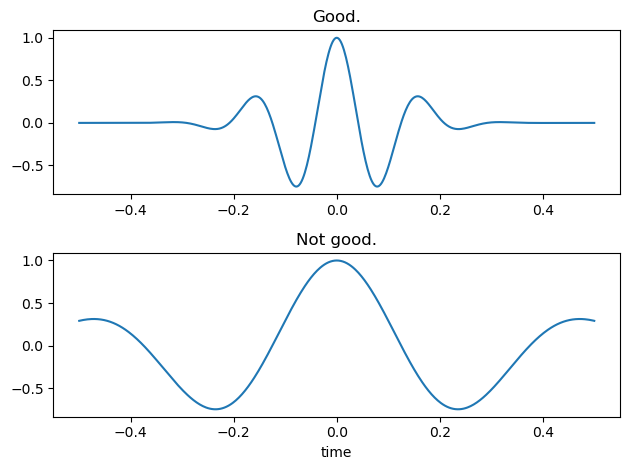

In [20]:
frequency = 6 # frequency of the sine wave
s_rate = 500  # note: should be the same as the data
time = np.arange(-.5,.5 + 1/s_rate,1/s_rate) # vector of time

# make wavelet
wavelet = np.exp(2*1j*np.pi*frequency*time) * np.exp(-time**2/(2*(4/(2*np.pi*frequency))**2))

plt.subplot(2,1,1)
plt.plot(time,np.real(wavelet))
plt.title("Good.")


# now make a wavelet that it too short
tooLowFrequency = 2
wavelet = np.exp(2*1j*np.pi*tooLowFrequency*time) * np.exp(-time**2/(2*(4/(2*np.pi*tooLowFrequency))**2))

plt.subplot(2,1,2)
plt.plot(time,np.real(wavelet))
plt.xlabel("time")
plt.title("Not good.")

plt.tight_layout()

## Figure 13.13

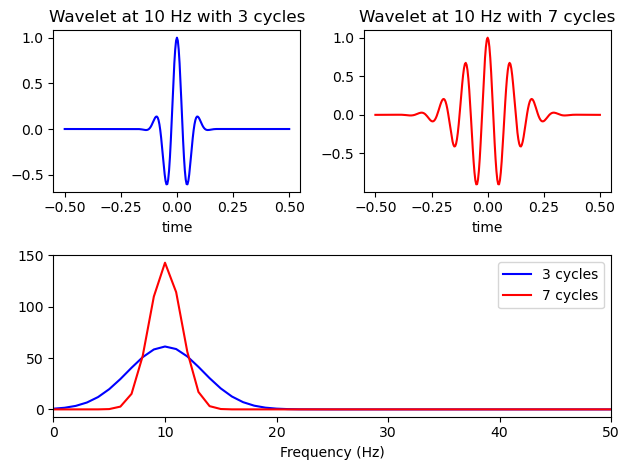

In [21]:
frequency = 10
time = np.arange(-0.5,0.5 + 1/srate,1/srate)
numcycles = [3,7]

wavecolors='br'

plt.figure()

for i,cycle in enumerate(numcycles):
    # make wavelet
    wavelet = np.exp(2*1j*np.pi*frequency*time) * np.exp(-time**2/(2*(cycle/(2*np.pi*frequency))**2))
    
    plt.subplot(2,2,i+1)
    plt.plot(time,np.real(wavelet),wavecolors[i])
    plt.xlabel("time")
    plt.title("Wavelet at " + str(frequency) + " Hz with " + str(cycle) + " cycles")
    
    plt.subplot(2,1,2)
    fft_wav = 2*np.abs(np.fft.fft(wavelet))
    hz_wav = np.linspace(0,srate/2,len(wavelet)//2+1)
    plt.plot(hz_wav,fft_wav[:len(hz_wav)],wavecolors[i])
    
plt.subplot(2,1,2)
plt.xlabel("Frequency (Hz)")
plt.xlim([0,50])
plt.legend([str(numcycles[0]) + " cycles", str(numcycles[1]) + " cycles"])

plt.tight_layout()

## Figure 13.14

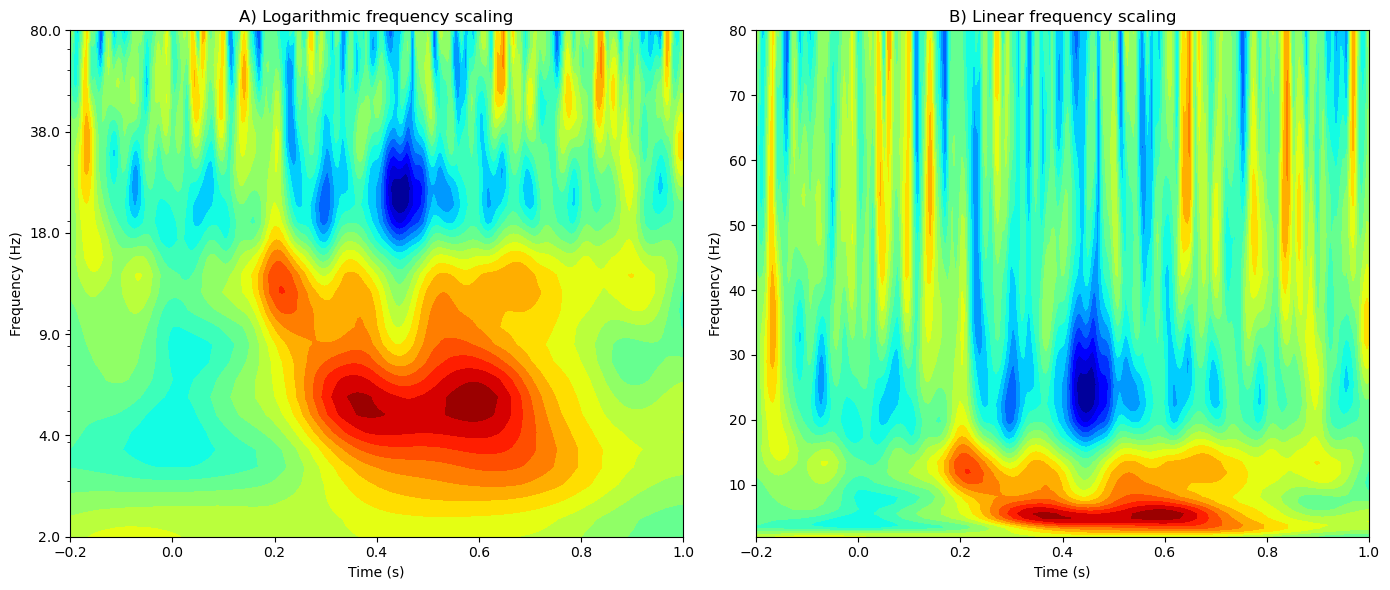

In [22]:
timefrequency(141)

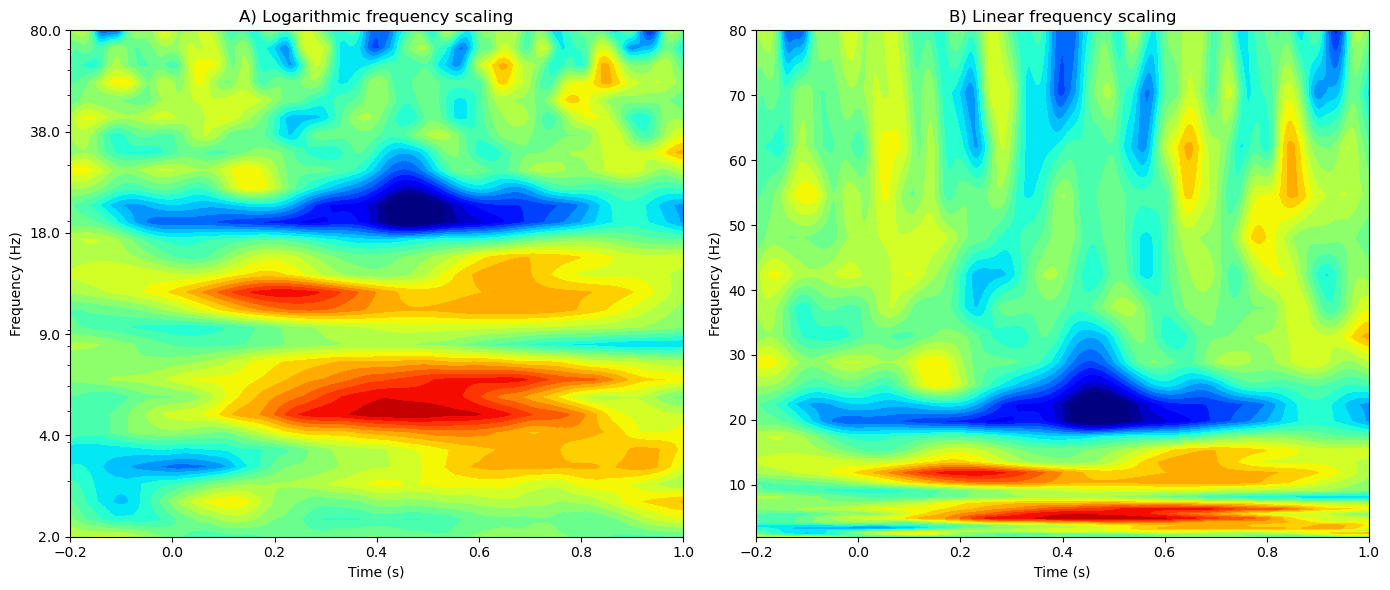

In [23]:
timefrequency(142)

## Figure 13.15

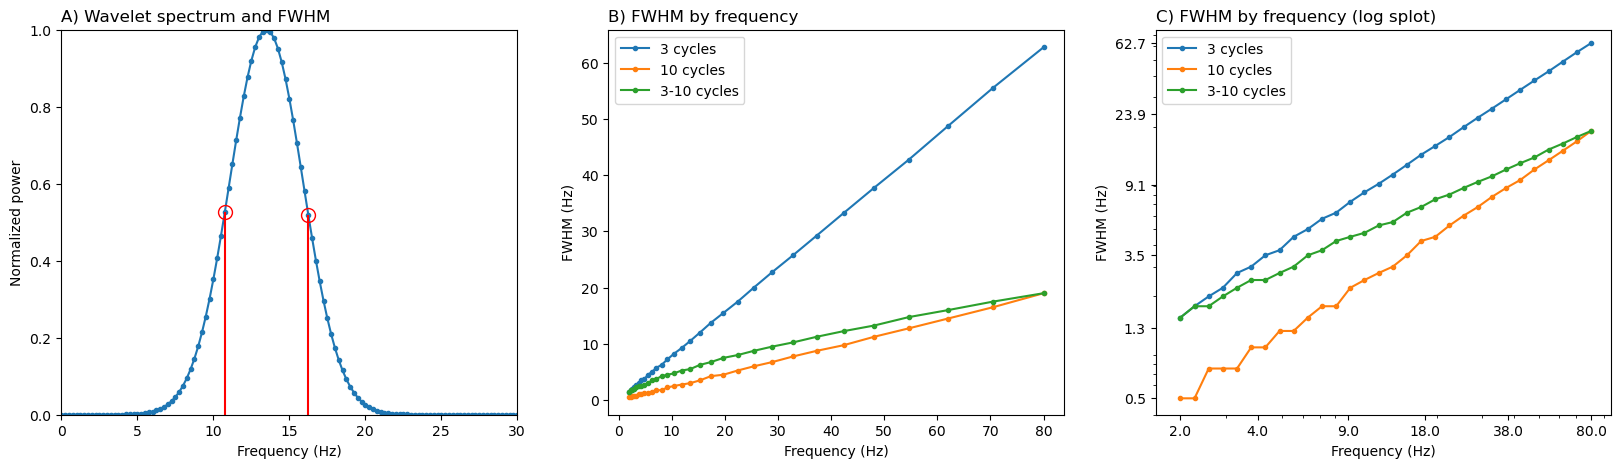

In [24]:
frex  = np.logspace(np.log10(2),np.log10(80),30)
srate = 500
time = np.arange(-2, 2+1/srate, 1/srate)
N     = len(time)
hz    = np.linspace(0, srate/2, N//2+1)
fwhm  = np.zeros([3,len(frex)])

fig = plt.figure(figsize=(20, 5))
    
for numcyclesi in range(3):

    if numcyclesi == 0:
        numcycles = np.tile(3,[len(frex)]);
    elif numcyclesi == 1:
        numcycles = np.tile(10,[len(frex)]);
    elif numcyclesi == 2:
        numcycles = np.logspace(np.log10(3),np.log10(10),len(frex));

    for fi in range(len(frex)):
        
        #make wavelet
        wavelet = np.exp(2*1j*np.pi*frex[fi]*time) * np.exp(-time**2/(2*(numcycles[fi]/(2*np.pi*frex[fi]))**2))
        
        #take FFT of wavelet
        fwave = np.fft.fft(wavelet)
        fwave = np.absolute(fwave[:len(hz)])*2
        
        #normalize power to [0,1]
        fwave -= np.min(fwave)
        fwave /= np.max(fwave)
        
        #find left and right 1/2
        peakx = np.argmax(fwave)
        left5 = np.argmin(np.abs(fwave[:peakx]-0.5))
        right5 = np.argmin(np.abs(fwave[peakx:]-0.5))
        right5 = right5 + peakx 
        
        fwhm[numcyclesi,fi] = hz[right5] - hz[left5]
        
        #plot one example of wavelet's power spectrum and fwhm
        if fi == np.ceil(len(frex)/2) and numcyclesi == 2:
            ax1 = fig.add_subplot(1, 3, 1)
            
            #plot power spectrum
            ax1.plot(hz,fwave,'.-')
            
            #plot fwhm
            ax1.plot(hz[left5],fwave[left5],'ro',markersize=10, markerfacecolor='none')
            ax1.plot(hz[right5],fwave[right5],'ro',markersize=10, markerfacecolor='none')
            #draw lines to frequencies
            ax1.vlines(hz[left5],0,fwave[left5],colors='r')
            ax1.vlines(hz[right5],0,fwave[right5],colors='r')
            ax1.set_xlim([0,30])
            ax1.set_ylim([0,1])
            ax1.set_xlabel('Frequency (Hz)')
            ax1.set_ylabel('Normalized power')
            ax1.set_title('A) Wavelet spectrum and FWHM', loc='left')

ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(frex,fwhm.T,'.-')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('FWHM (Hz)')
ax2.set_title('B) FWHM by frequency', loc='left')
ax2.legend(['3 cycles','10 cycles','3-10 cycles'])


ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(frex, fwhm.T, '.-')

# ラベルと凡例の設定
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('FWHM (Hz)')
ax3.legend(['3 cycles', '10 cycles', '3-10 cycles'])

# 軸の設定
ax3.set_xlim([frex[0] * 0.8, frex[-1] * 1.2])
ax3.set_ylim([np.min(fwhm) * 0.8, np.max(fwhm) * 1.2])
ax3.set_xscale('log')
ax3.set_yscale('log')

# 目盛りとラベルの設定
xticks = np.round(np.logspace(np.log10(frex[0]), np.log10(frex[-1]), 6))
yticks = np.round(10 * np.logspace(np.log10(np.min(fwhm)), np.log10(np.max(fwhm)), 6)) / 10
ax3.set_xticks(xticks)
ax3.set_yticks(yticks)
ax3.set_xticklabels(xticks)
ax3.set_yticklabels(yticks)
ax3.set_title('C) FWHM by frequency (log splot)', loc='left')

plt.show()